In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data_train.shape

(891, 12)

In [4]:
data_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
from IPython.core.display import HTML
HTML('<title>EDA</title><br><h1>Learn about the data!</h1><h2>For each variable:</h2><br><li>Is the variable categorical?<br><li>If not, Min Max and Average values?<br><li>If yes,what are the categories?<br><li>are there missing values?<br><li>Info about the distribution of the variable')

In [6]:
data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

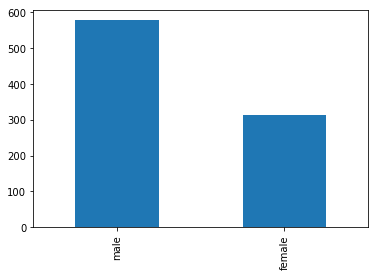

In [7]:
data_train.Sex.value_counts().plot(kind='bar')

In [8]:
data_train[data_train.Sex == 'female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [9]:
data_train[data_train.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
data_train.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

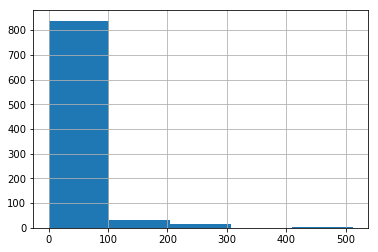

In [11]:
data_train.Fare.hist(bins=5)

In [12]:
data_test[data_test.Fare.isnull()]
data_test['Fare'] = data_test['Fare'].fillna(value=data_test.Fare.mean())
data_test[data_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
data_train[data_train.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [14]:
data_test[data_test.Cabin.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


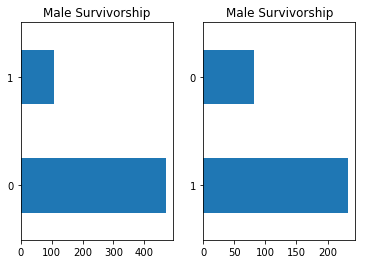

In [15]:
#women and children first?
fig, axs = plt.subplots(1,2)
data_train[data_train.Sex == 'male'].Survived.value_counts().plot(kind='barh',ax=axs[0],title="Male Survivorship")
data_train[data_train.Sex == 'female'].Survived.value_counts().plot(kind='barh',ax=axs[1],title="Male Survivorship")

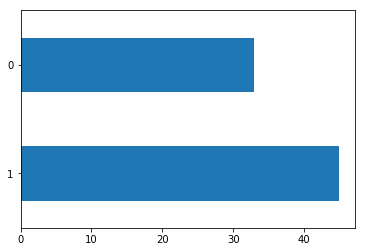

In [16]:
data_train[data_train.Age<15].Survived.value_counts().plot(kind='barh')

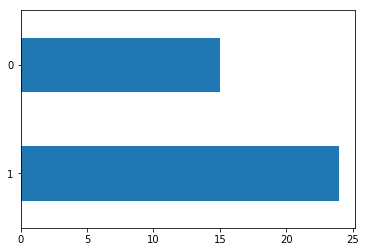

In [17]:
data_train[(data_train.Age<15)&(data_train.Sex =='female')].Survived.value_counts().plot(kind='barh')

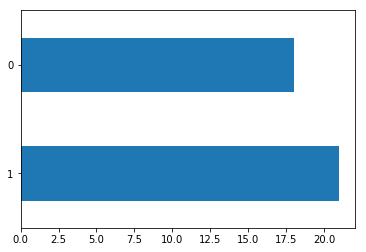

In [18]:
data_train[(data_train.Age<15)&(data_train.Sex =='male')].Survived.value_counts().plot(kind='barh')

In [19]:
data_test[data_test.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


Handling Missing Age.....

Strategies:
<li>Strip any observation with missing age
<li>Set NaN age to 0 in case of continous distribution and create category for NaN in case of categorical distribution
<li>Use some average value.
<li>Create a machine learning algorithm to predict missing values

In [20]:
avg_age = data_train.Age.mean()
avg_tes = data_test.Age.mean()

In [21]:
data_train.Age = data_train.fillna(value=avg_age)
data_test.Age = data_test.fillna(value=avg_tes)

In [22]:
data_train[data_train.Age.isnull()]
data_test[data_test.Age.isnull()]
#data_train['Age'].fillna(X.Age.mean(),inplace=True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


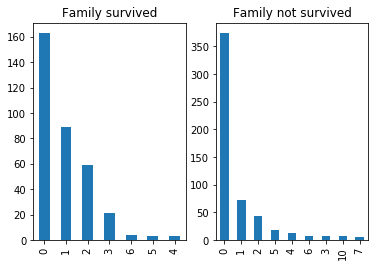

In [23]:
data_train['Family_Size'] = data_train['SibSp']+data_train['Parch']
data_test['Family_Size'] = data_test['SibSp']+data_test['Parch']
fig,axs = subplots(1,2)
data_train[data_train.Survived == 1].Family_Size.value_counts().plot(kind='bar',ax=axs[0],title='Family survived')
data_train[data_train.Survived == 0].Family_Size.value_counts().plot(kind='bar',title='Family not survived')

In [24]:
data_train['Family_Size'].value_counts()
data_test['Family_Size'].value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: Family_Size, dtype: int64

In [25]:
"""
######################################################
def function(data_train):
    for row in data_train.iterrows():
        if row['Family_Size'] == 0:
            val = 1
        else:
            val = 0
    return val

data_train['Is_Alone'] = data_train.apply(function, axis=1)
#######################################################

"""
def function(row):
    val = 0
    if row['Family_Size'] == 0:
        val = 1
    else:
        val = 0
    return val

data_train['Is_Alone'] = data_train.apply(lambda row : function(row),axis=1)
data_test['Is_Alone'] = data_test.apply(lambda row : function(row),axis=1)

In [26]:
data_train['Is_Alone'].value_counts()
data_test['Is_Alone'].value_counts()

1    253
0    165
Name: Is_Alone, dtype: int64

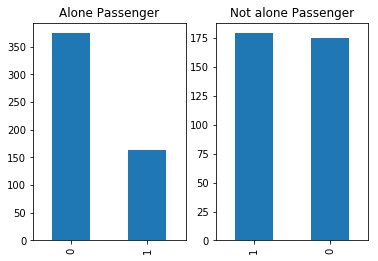

In [27]:
fig, axs = subplots(1,2)
data_train[data_train.Is_Alone == 1].Survived.value_counts().plot(kind='bar',ax = axs[0],title='Alone Passenger')
data_train[data_train.Is_Alone == 0].Survived.value_counts().plot(kind='bar',ax = axs[1],title='Not alone Passenger')

In [28]:
data_train.pop('SibSp')
data_train.pop('Parch')
data_test.pop('SibSp')
data_test.pop('Parch')
data_train.describe()
data_test.describe()

,PassengerId,Pclass,Fare,Family_Size,Is_Alone
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,35.627188,0.839713,0.605263
std,120.810458,0.841838,55.840500,1.519072,0.489380
min,892.000000,1.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,14.454200,0.000000,1.000000
75%,1204.750000,3.000000,31.500000,1.000000,1.000000
max,1309.000000,3.000000,512.329200,10.000000,1.000000


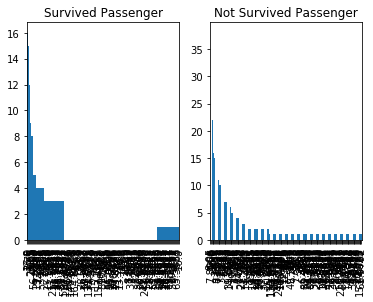

In [29]:
fig, axs = subplots(1,2)
data_train[data_train.Survived == 1].Fare.value_counts().plot(kind='bar',ax = axs[0],title='Survived Passenger')
data_train[data_train.Survived == 0].Fare.value_counts().plot(kind='bar',ax = axs[1],title='Not Survived Passenger')

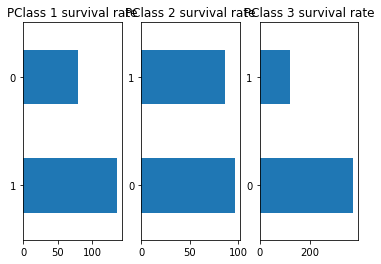

In [30]:
fix, axs = subplots(1,3)
data_train[data_train.Pclass == 1].Survived.value_counts().plot(kind='barh',ax=axs[0],title='PClass 1 survival rate')
data_train[data_train.Pclass == 2].Survived.value_counts().plot(kind='barh',ax=axs[1],title='PClass 2 survival rate')
data_train[data_train.Pclass == 3].Survived.value_counts().plot(kind='barh',ax=axs[2],title='PClass 3 survival rate')

In [31]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer(neg_label=0,pos_label=1,sparse_output=False)
lb.fit_transform(data_train['Sex'])
print lb.classes_

data_train.Sex

['female' 'male']


0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [32]:
data_train['Sex'][data_train['Sex'] == 'male'] = 0
data_train['Sex'][data_train['Sex'] == 'female'] = 1

data_test['Sex'][data_test['Sex'] == 'male'] = 0
data_test['Sex'][data_test['Sex'] == 'female'] = 1

data_train['Embarked'][data_train['Embarked'] == 'S'] = 0
data_train['Embarked'][data_train['Embarked'] == 'C'] = 1
data_train['Embarked'][data_train['Embarked'] == 'Q'] = 2

data_test['Embarked'][data_test['Embarked'] == 'S'] = 0
data_test['Embarked'][data_test['Embarked'] == 'C'] = 1
data_test['Embarked'][data_test['Embarked'] == 'Q'] = 2

data_train[data_train.Embarked.isnull()]
data_train.dtypes

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Family_Size      int64
Is_Alone         int64
dtype: object

In [33]:
data_train[data_train.Sex.isnull()]
data_train.Embarked = data_train.fillna(value=data_train.Embarked.mean())
data_train['Age'].astype(str).astype(int)
data_train['Sex'].astype(str).astype(int)
data_train['Embarked'].astype(str).astype(int)
data_feature =data_train[['Age','Pclass','Is_Alone','Family_Size','Embarked','Sex','Survived']]
data_feature['Embarked'] = pd.to_numeric(data_feature['Embarked'], errors='ignore')
data_feature['Sex'] = pd.to_numeric(data_feature['Sex'], errors='ignore')

data_feature.dtypes

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Age            object
Pclass          int64
Is_Alone        int64
Family_Size     int64
Embarked        int64
Sex             int64
Survived        int64
dtype: object

In [34]:
data_test[data_test.Sex.isnull()]
data_test.Embarked = data_test.fillna(value=data_test.Embarked.mean())
data_test['Age'].astype(str).astype(int)
data_test['Sex'].astype(str).astype(int)
data_test['Embarked'].astype(str).astype(int)
test_feature =data_test[['Age','Pclass','Is_Alone','Family_Size','Embarked','Sex']]
test_feature['Embarked'] = pd.to_numeric(test_feature['Embarked'], errors='ignore')
test_feature['Sex'] = pd.to_numeric(test_feature['Sex'], errors='ignore')

test_feature.dtypes

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Age            object
Pclass          int64
Is_Alone        int64
Family_Size     int64
Embarked        int64
Sex             int64
dtype: object

In [35]:
import seaborn as sns

sns.heatmap(data_feature)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [36]:
x_train, x_validate, x_test = np.split(data_feature.sample(frac=1), [int(.6*len(data_feature)), int(.8*len(data_feature))])
y_train = x_train.pop('Survived')
y_validate = x_validate.pop('Survived')
y_test = x_test.pop('Survived')

from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_validate = normalize(x_validate)
x_test = normalize(x_test)
test_feature = normalize(test_feature)

In [40]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_log = LogisticRegression()
clf_svc = SVC()
clf_rbf = SVC(kernel='rbf')
clf_ran = RandomForestClassifier()


clf_knn.fit(x_train,y_train)
y_val = clf_knn.predict(x_validate)
score = accuracy_score(y_validate,y_val)
print score
clf_knn.fit(x_validate,y_validate)
y_label = clf_knn.predict(x_test)
score = accuracy_score(y_test,y_label)
print score
clf_knn.fit(x_test,y_test)
test_label = clf_knn.predict(test_feature)

0.797752808989
0.754189944134


In [41]:
clf_log.fit(x_train,y_train)
y_val = clf_log.predict(x_validate)
score = accuracy_score(y_validate,y_val)
print score
clf_log.fit(x_validate,y_validate)
y_label = clf_log.predict(x_test)
score = accuracy_score(y_test,y_label)
print score
clf_log.fit(x_test,y_test)
test_label = clf_log.predict(test_feature)

0.584269662921
0.597765363128


In [42]:
clf_svc.fit(x_train,y_train)
y_val = clf_svc.predict(x_validate)
score = accuracy_score(y_validate,y_val)
print score
clf_svc.fit(x_validate,y_validate)
y_label = clf_svc.predict(x_test)
score = accuracy_score(y_test,y_label)
print score
clf_svc.fit(x_test,y_test)
test_label = clf_svc.predict(test_feature)

0.584269662921
0.597765363128


In [45]:
clf_rbf.fit(x_train,y_train)
y_val = clf_rbf.predict(x_validate)
score = accuracy_score(y_validate,y_val)
print score
clf_rbf.fit(x_validate,y_validate)
y_label = clf_rbf.predict(x_test)
score = accuracy_score(y_test,y_label)
print score
clf_rbf.fit(x_test,y_test)
test_label = clf_rbf.predict(test_feature)

0.584269662921
0.597765363128


In [44]:
clf_ran.fit(x_train,y_train)
y_val = clf_ran.predict(x_validate)
score = accuracy_score(y_validate,y_val)
print score
clf_ran.fit(x_validate,y_validate)
y_label = clf_ran.predict(x_test)
score = accuracy_score(y_test,y_label)
print score
clf_ran.fit(x_test,y_test)
test_label = clf_ran.predict(test_feature)

0.741573033708
0.765363128492
